In [36]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation,Conv2D,MaxPooling2D
import tkinter as tk
import cv2
from PIL import ImageTk,Image,ImageDraw

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train[0].shape) 
x_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


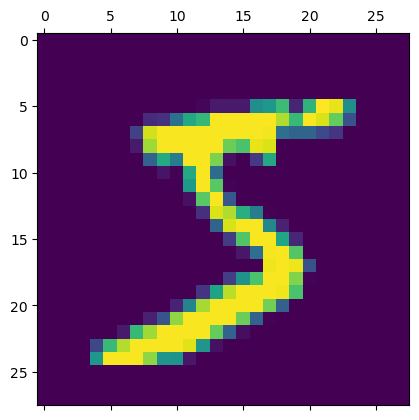

In [4]:
plt.matshow(x_train[0])
print(y_train[0])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape

(60000, 784)

In [7]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=10)
clf.fit(x_train_flattened, y_train)
clf.score(x_test_flattened, y_test)

0.8727

(7, 7, <matplotlib.image.AxesImage at 0x2811fcfbc10>)

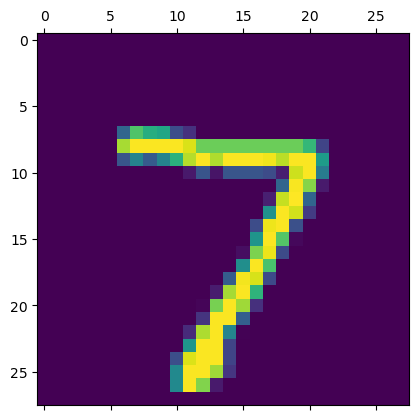

In [8]:
y_predicted = clf.predict(x_test_flattened)
y_predicted[0],y_test[0],plt.matshow(x_test[0])

[[ 915    2    5    4    7   18   10    4   10    5]
 [   0 1102    5    6    1    9    2    2    8    0]
 [  12   12  886   15   12   12   24   19   33    7]
 [   5   13   27  844    3   55    4   13   26   20]
 [  11    4   13   10  844    6   16    4   19   55]
 [  18    7    3   55    8  740   22    1   18   20]
 [  19    6   14    4   27   25  841    4   16    2]
 [   2   12   49   21   16    5    1  882    9   31]
 [   7    5   24   29   20   24   15    6  810   34]
 [   8    6    9   27   33   15    6   15   27  863]]


Text(83.22222222222221, 0.5, 'Truth')

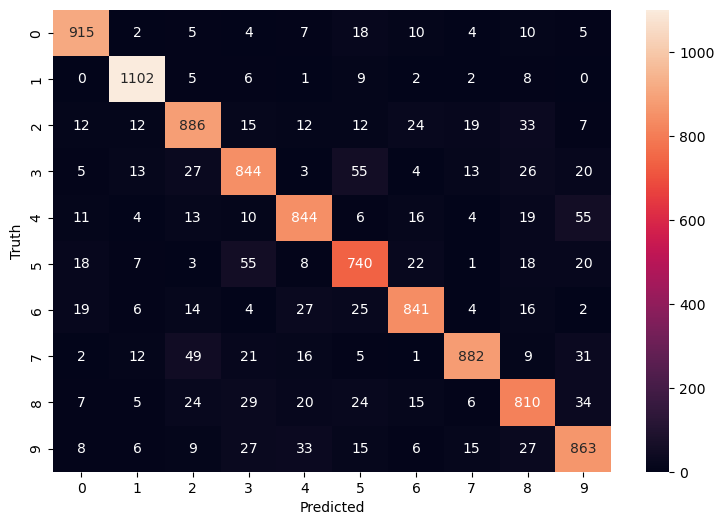

In [9]:
CM = confusion_matrix(y_test,y_predicted )
print(CM)
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.94      0.97      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.84      0.83      1010
           4       0.87      0.86      0.86       982
           5       0.81      0.83      0.82       892
           6       0.89      0.88      0.89       958
           7       0.93      0.86      0.89      1028
           8       0.83      0.83      0.83       974
           9       0.83      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [11]:
MLP=Sequential()

MLP.add(Flatten(input_shape=(28,28)))
MLP.add(Dense(512,activation='relu'))
MLP.add(Dense(256,activation='relu'))
MLP.add(Dense(128,activation='sigmoid'))
MLP.add(Dense(64,activation='sigmoid'))
MLP.add(Dense(10,activation='softmax'))

MLP.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

MLP.fit(x_train, y_train, epochs=7)

Epoch 1/7


C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8544 - loss: 0.5769
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0942
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0628
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0451
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0347
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0283
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0253


In [12]:
MLP.save_weights('C:\handwriting_digit_recognition/mnist.weights.h5')

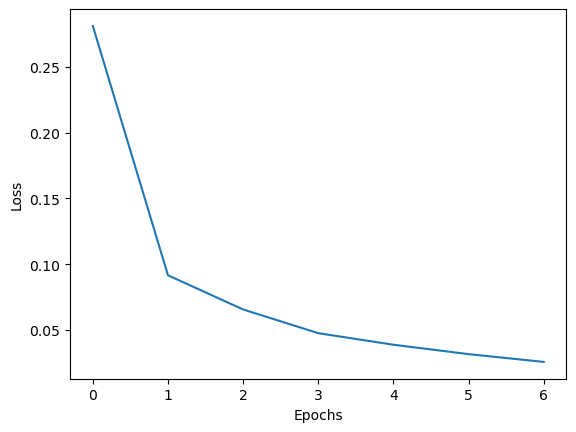

In [13]:
plt.plot(MLP.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

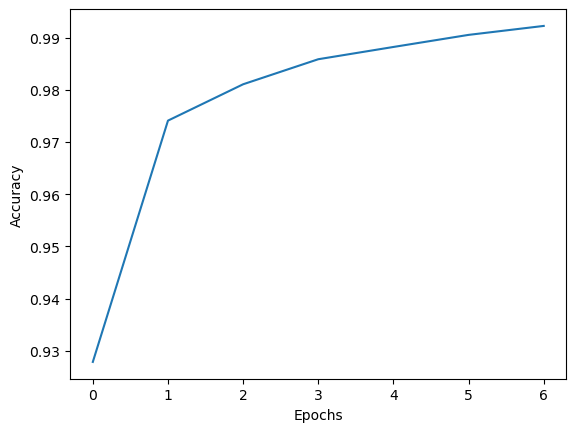

In [14]:
plt.plot(MLP.history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [15]:
MLP.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9760 - loss: 0.0999


[0.08360982686281204, 0.9793000221252441]

In [16]:
y_predicted = MLP.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
y_predicted[0]
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

[[ 963    0    2    1    1    3    7    0    2    1]
 [   1 1113    3    4    0    0    2    3    8    1]
 [   2    0 1021    2    1    0    0    4    2    0]
 [   0    0    7  981    0    5    0    5    4    8]
 [   0    0    4    0  957    0    4    1    1   15]
 [   2    0    0    5    1  874    2    1    3    4]
 [   1    2    0    1    4    8  940    0    2    0]
 [   0    1   10    1    1    0    0 1003    4    8]
 [   0    0    5    2    5    0    0    4  952    6]
 [   0    2    0    1   10    4    0    3    0  989]]


Text(83.22222222222221, 0.5, 'Truth')

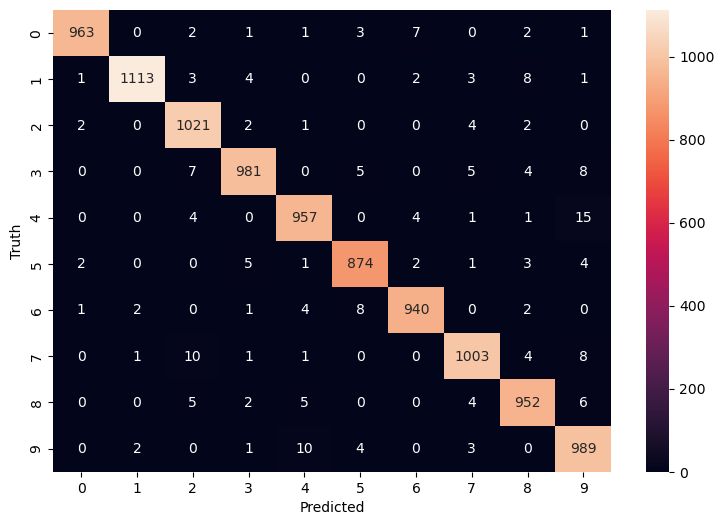

In [19]:
CM = confusion_matrix(y_test,y_predicted_labels )
print(CM)
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

input_shape = (28, 28, 1)

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('x_train shape', x_train.shape)

x_train[0]

Number of images in x_train 60000
Number of images in x_test 10000
x_train shape (60000, 28, 28, 1)


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [22]:
CNN = Sequential()

CNN.add (Conv2D(64,(3,3), input_shape = input_shape)) 
CNN.add(Activation("relu")) 
CNN.add (MaxPooling2D(pool_size=(2,2))) 


CNN.add (Conv2D(64,(3,3))) 
CNN.add(Activation("relu"))
CNN.add (MaxPooling2D(pool_size=(2,2)))


CNN.add (Conv2D(64,(3,3)))
CNN.add(Activation("relu"))
CNN.add (MaxPooling2D(pool_size=(2,2)))


CNN.add (Flatten())
CNN.add(Dense(64))
CNN.add(Activation("relu"))


CNN.add(Dense(32))
CNN.add(Activation("relu"))


CNN.add(Dense(10)) 
CNN.add(Activation("softmax")) 


CNN.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

CNN.fit(x_train, y_train, epochs=7)

Epoch 1/7


C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8387 - loss: 0.4931
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9738 - loss: 0.0846
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9831 - loss: 0.0550
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9854 - loss: 0.0445
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9898 - loss: 0.0335
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9913 - loss: 0.0284
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9919 - loss: 0.0228


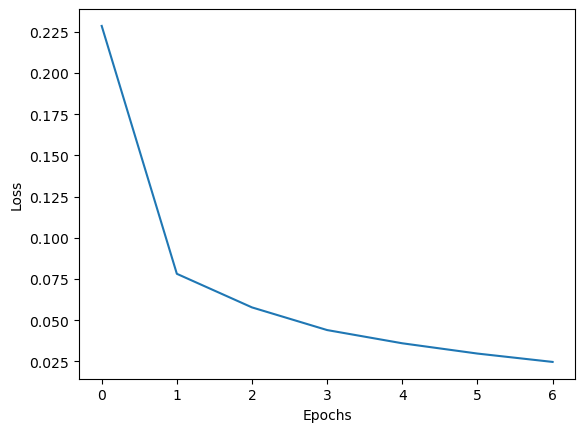

In [23]:
plt.plot(CNN.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


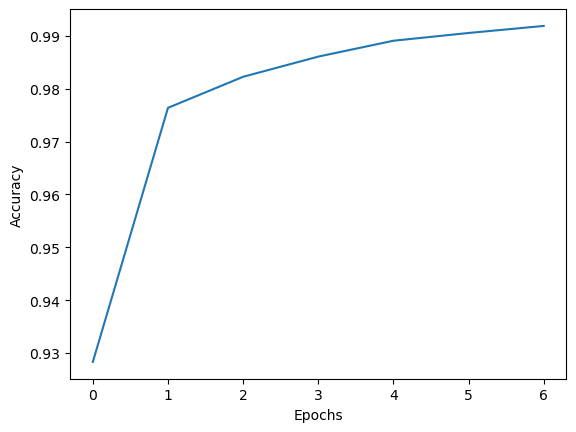

In [24]:
plt.plot(CNN.history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [25]:
CNN.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0618


[0.049770891666412354, 0.9872999787330627]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 973    1    1    1    0    0    2    2    0    0]
 [   0 1133    0    1    0    0    0    0    1    0]
 [   4    0 1011    0    1    0    1   15    0    0]
 [   0    0    3  998    0    4    0    4    1    0]
 [   1    0    2    0  977    1    0    1    0    0]
 [   1    0    0    6    0  880    3    2    0    0]
 [   2    3    1    0    1    1  948    0    2    0]
 [   3    2    8    1    0    1    0 1011    0    2]
 [   0    0    3    0    1    1    0    0  968    1]
 [   6    0    0    0   14    5    0    8    2  974]]


Text(83.22222222222221, 0.5, 'Truth')

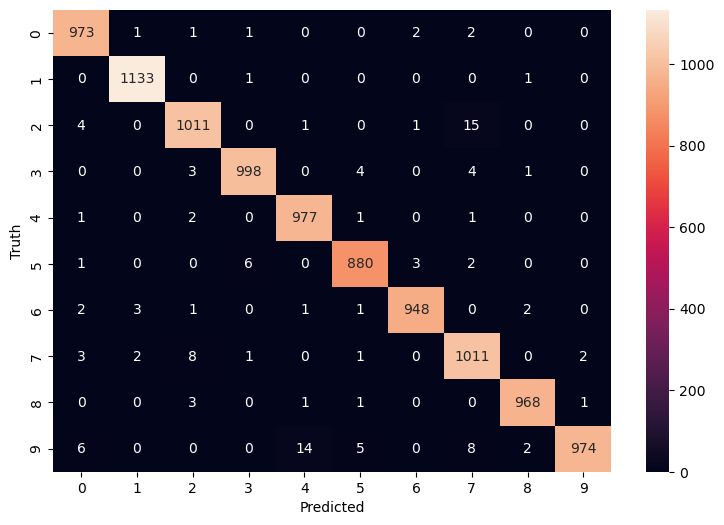

In [26]:
y_predicted = CNN.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
CM = confusion_matrix(y_test,y_predicted_labels )
print(CM)
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [28]:
pca = PCA(0.95)
x_train_flattened_pca = pca.fit_transform(x_train_flattened)
x_test_flattened_pca = pca.transform(x_test_flattened)
x_train_flattened_pca.shape , x_test_flattened_pca.shape

((60000, 154), (10000, 154))

In [100]:
MLP.load_weights('C:\handwriting_digit_recognition/mnist.weights.h5')

def event_function(event):
    
    x=event.x
    y=event.y
    
    x1=x-20
    y1=y-20
    
    x2=x+20
    y2=y+20

    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')



def clear():
    
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_status.config(text='PREDICTED DIGIT: NONE')

def predict():
    
    img_array=np.array(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array=cv2.resize(img_array,(28,28))
    
    img_array=img_array/255.0
    img_array=img_array.reshape(1,28,28)
    result=MLP.predict(img_array)
    label=np.argmax(result,axis=1)
    
    label_status.config(text='PREDICTED DIGIT:'+str(label))
    
count=0
    
win=tk.Tk()
win.title("Digit Recognizer")

canvas=tk.Canvas(win,width=500,height=500,bg='midnightblue')
canvas.pack(pady = 20)
canvas.grid(row=0,column=0,columnspan=4)
    
button_predict=tk.Button(win,text='PREDICT',bg='Black',fg='white',font='Helvetica 20 bold',command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='Red',fg='white',font='Helvetica 20 bold',command=clear)
button_clear.grid(row=1,column=2)


label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font='Helvetica 24 bold')
label_status.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(500,500),(0,0,0))
img_draw=ImageDraw.Draw(img)

win.mainloop()